# Regularized Linear Regression (Bias Vs Variance)

# Loading and Visualizing the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [4]:
data = loadmat('ex5data1.mat')
X = data['X']
y = data['y']
Xtest = data['Xtest']
ytest = data['ytest']
Xval = data['Xval']
yval = data['yval']

(0, 40)

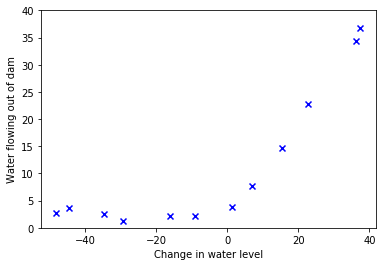

In [14]:
plt.scatter(X, y, marker='x', color='b')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of dam')
plt.ylim(0, 40)

# Regularized Linear Regression cost and gradient

In [31]:
def linearRegressionCostFunction(X, y, theta, Lambda):
    
    m = len(y)
    predictions = np.dot(X, theta)
    
    cost = (1 / (2*m)) * np.sum(np.square(predictions - y))
    reg_cost = cost + (Lambda/(2 * m)) * np.sum(np.square(theta[1:]))
    
    gradient0 = (1/m) * np.dot(X.T, predictions - y)
    gradient =  (1/m) * np.dot(X.T, predictions - y) + (Lambda/m) * theta
    reg_gradient = np.vstack((gradient0[0], gradient[1:]))
    
    return reg_cost, reg_gradient

In [32]:
m = X.shape[0]
theta = np.ones((2,1))
X_1 = np.hstack((np.ones((m,1)),X))
cost, grad = linearRegressionCostFunction(X_1, y, theta, 1)
print("Cost at theta = [1 ; 1]:",cost)
print("Gradient at theta = [1 ; 1]:",grad)

Cost at theta = [1 ; 1]: 303.9931922202643
Gradient at theta = [1 ; 1]: [[-15.30301567]
 [598.25074417]]


# Fitting linear regression

In [33]:
def gradientDescent(X, y, theta, alpha, epochs, Lambda):
    
    J_history = []
    
    for i in range(epochs):
        J, grad = linearRegressionCostFunction(X, y, theta, Lambda)
        theta = theta - (alpha * grad)
        J_history.append(J)
    
    return theta, J_history

In [34]:
Lambda = 0 #unregularized
theta, J_history = gradientDescent(X_1,y,np.zeros((2,1)),0.001,4000,Lambda)

# Plotting cost function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

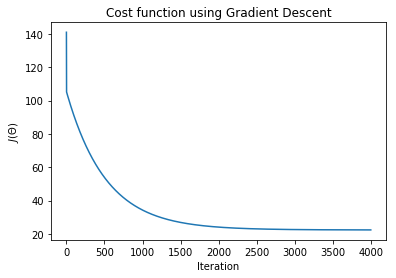

In [35]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

(-50, 40)

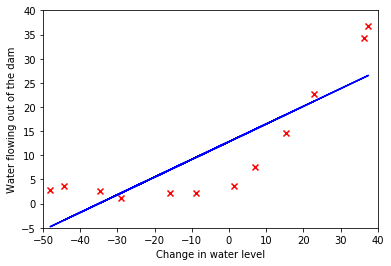

In [37]:
plt.scatter(X , y, marker="x", color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")

yhat = [ i * theta[1] + theta[0] for i in X]
plt.plot(X ,yhat, color="b")
plt.ylim(-5,40)
plt.xlim(-50,40)

# Learning curves

In [43]:
def learningCurve(X, y, Xval, yval, Lambda):
    """
    Returns the train and cross validation set errors for a learning curve
    """
    m = len(y)
    n = X.shape[1]
    train_error, val_error = [],[]
    
    for i in range(1, m+1):
        theta, J_history = gradientDescent(X[0:i,:], y[0:i,:], np.zeros((n,1)), 0.001, 3000, Lambda)
        train_error.append(J_history[-1])
        val_error.append(linearRegressionCostFunction(Xval, yval, theta, Lambda)[0])
        
    return train_error, val_error

In [44]:
Xval_1 = np.hstack((np.ones((Xval.shape[0], 1)), Xval))
error_train, error_val = learningCurve(X_1, y, Xval_1, yval, Lambda)

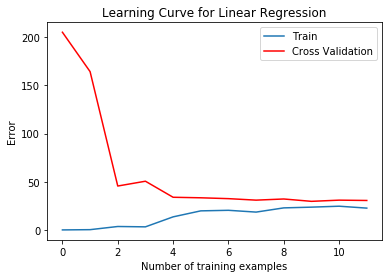

In [45]:
plt.plot(range(12), error_train, label="Train")
plt.plot(range(12), error_val, label="Cross Validation", color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

In [46]:
print("# Training Examples\t Train Error \t\t Cross Validation Error")
for i in range(1,13):
    print("\t",i,"\t\t",error_train[i-1],"\t",error_val[i-1],"\n")

# Training Examples	 Train Error 		 Cross Validation Error
	 1 		 9.860761315262648e-32 	 205.1210957454735 

	 2 		 0.2667167138283979 	 164.2535605474932 

	 3 		 3.5487038551048298 	 45.54817576824285 

	 4 		 3.1881425466952673 	 50.52763121765736 

	 5 		 13.544395157808424 	 33.8818916785026 

	 6 		 19.77146317688599 	 33.33501763960231 

	 7 		 20.355412106505995 	 32.44949025865311 

	 8 		 18.491982016887317 	 30.897434817077908 

	 9 		 22.86542238258511 	 32.09291116304466 

	 10 		 23.625225847923055 	 29.654014029816686 

	 11 		 24.60514598057906 	 30.890073919404436 

	 12 		 22.62091598736682 	 30.554053720180832 



# Polynomial regression

In [47]:
def polyFeatures(X, p):
    """
    Takes a data matrix X (size m x 1) and maps each example into its polynomial features 
    where X_poly(i, :) = [X(i) X(i).^2 X(i).^3 ...  X(i).^p]
    """
    for i in range(2, p+1):
        X = np.hstack((X, (X[:,0]**i)[:, np.newaxis]))
    
    return X

In [48]:
p=8
X_poly = polyFeatures(X, p)

# Feature Normalization

In [49]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_poly = sc_X.fit_transform(X_poly)
X_poly = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))

In [51]:
# Normalizing validation and test sets
X_poly_test = polyFeatures(Xtest, p)
X_poly_test = sc_X.fit_transform(X_poly_test)
X_poly_test = np.hstack((np.ones((X_poly_test.shape[0], 1)), X_poly_test))

X_poly_val = polyFeatures(Xval, p)
X_poly_val = sc_X.fit_transform(X_poly_val)
X_poly_val = np.hstack((np.ones((X_poly_val.shape[0], 1)), X_poly_val))

# Learning polynomial regression

In [53]:
theta, J_history = gradientDescent(X_poly, y, np.zeros((p+1, 1)), 0.3, 20000, Lambda=0)

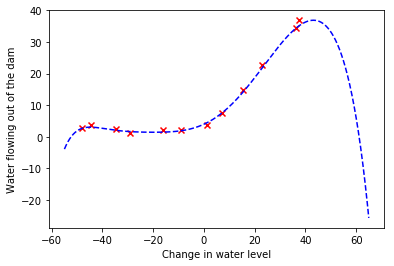

In [55]:
plt.scatter(X, y, marker='x', color='r')
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value = np.linspace(-55,65,2400)

# Map the X values and normalize
x_value_poly = polyFeatures(x_value[:,np.newaxis], p)
x_value_poly = sc_X.transform(x_value_poly)
x_value_poly = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value = x_value_poly @ theta
plt.plot(x_value,y_value,"--",color="b")

In [56]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, Lambda)

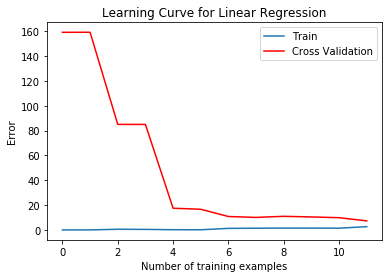

In [57]:
plt.plot(range(12),error_train,label="Train")
plt.plot(range(12),error_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend()

# Regularizing

In [62]:
Lambda = 1
theta_poly, J_history_poly = gradientDescent(X_poly,y,np.zeros((9,1)),0.01,20000,Lambda)

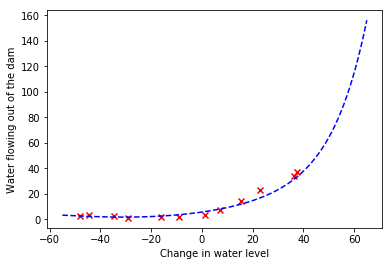

In [63]:
plt.scatter(X,y,marker="x",color="r")
plt.xlabel("Change in water level")
plt.ylabel("Water flowing out of the dam")
x_value=np.linspace(-55,65,2400)

# Map the X values and normalize
x_value_poly = polyFeatures(x_value[:,np.newaxis], p)
x_value_poly = sc_X.transform(x_value_poly)
x_value_poly = np.hstack((np.ones((x_value_poly.shape[0],1)),x_value_poly))
y_value= x_value_poly @ theta_poly
plt.plot(x_value,y_value,"--",color="b")

In [64]:
error_train, error_val = learningCurve(X_poly, y, X_poly_val, yval, Lambda)

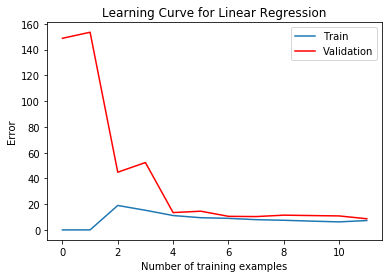

In [66]:
plt.plot(range(12),error_train,label="Train")
plt.plot(range(12),error_val,label="Cross Validation",color="r")
plt.title("Learning Curve for Linear Regression")
plt.xlabel("Number of training examples")
plt.ylabel("Error")
plt.legend(('Train', 'Validation'))